<a href="https://colab.research.google.com/github/RCTom168/DS-Unit-2-Kaggle-Challenge/blob/master/LS_DS_U2_Week_8_Build_Project_UK_Car_Accidents_2018_Road_Safety_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Source
##### UK 2018 Road Safety Data: https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

##### Blog Post: https://rctom168.github.io/2020-02-07-UK-Car-Accidents-Blog-Post/

## Import Tools

In [0]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

## Import Datasets

In [2]:
# Import 2018 Accidents Data
accidents = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

# Import 2018 Casualties Data
casualties=pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

# Import 2018 Vehicles Data
vehicles=pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

print("accidents.shape:", '\n', accidents.shape, '\n', "---"*20)
print("casualties.shape:", '\n', casualties.shape, '\n', "---"*20)
print("vehicles.shape:", '\n', vehicles.shape, '\n', "---"*20)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


accidents.shape: 
 (122635, 31) 
 ------------------------------------------------------------
casualties.shape: 
 (160597, 15) 
 ------------------------------------------------------------
vehicles.shape: 
 (226409, 22) 
 ------------------------------------------------------------


## Join the Accidents and Vehicles Datasets

In [0]:
# Join the Accidents and Vehicles datasets for easier usage
accidents_vehicles = accidents.join(vehicles, how='outer')

## Question

### We are going to try to predict the severity of accidents that occurred in the UK throughout the year of 2018. We are also going to take a look at what features impact the severity of these accidents the most.

## Correlations between Variables

accidents.corr().shape: 
 (27, 27) 
 ------------------------------------------------------------


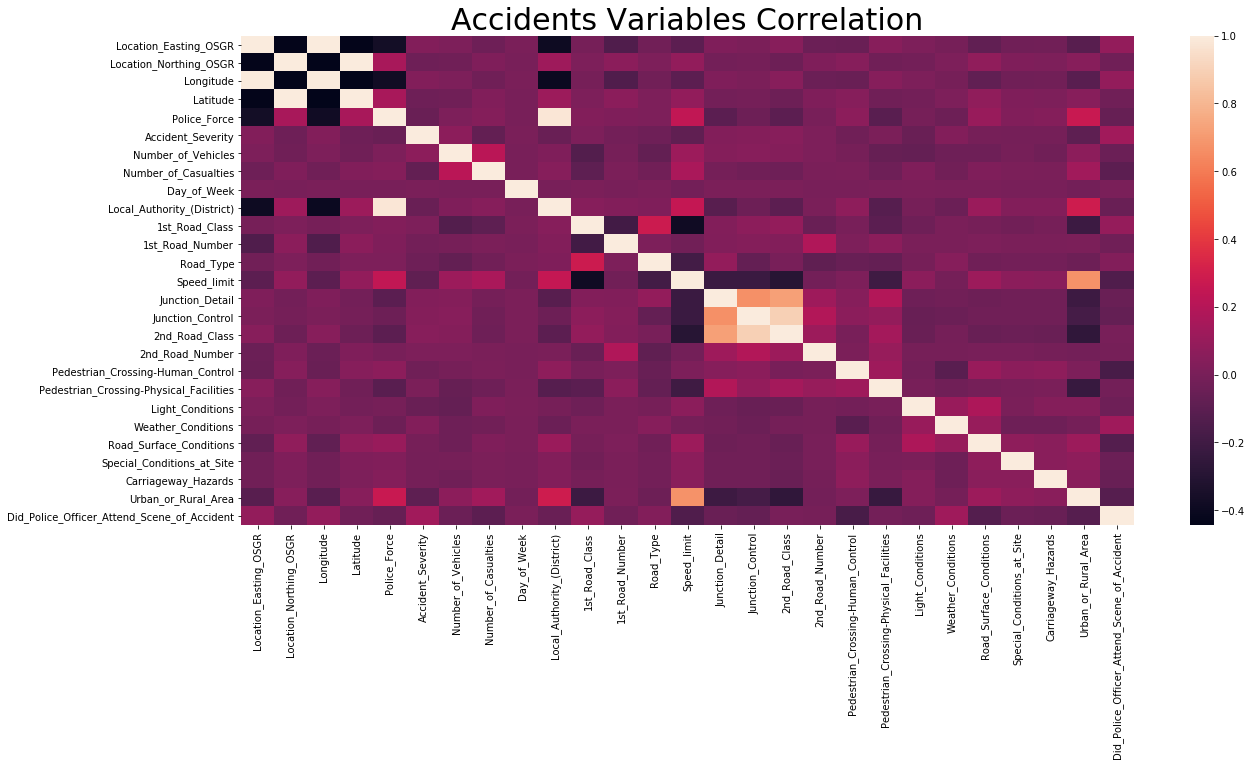

In [4]:
# Correlation between variables in the 2018 Accidents Dataset
acc_corr =  accidents.corr()
print("accidents.corr().shape:", '\n', accidents.corr().shape, '\n', "---"*20)
plt.subplots(figsize=(20,9))
plt.title('Accidents Variables Correlation',fontsize= 30)
sns.heatmap(acc_corr)

accidents_vehicles.corr().shape: 
 (49, 49) 
 ------------------------------------------------------------


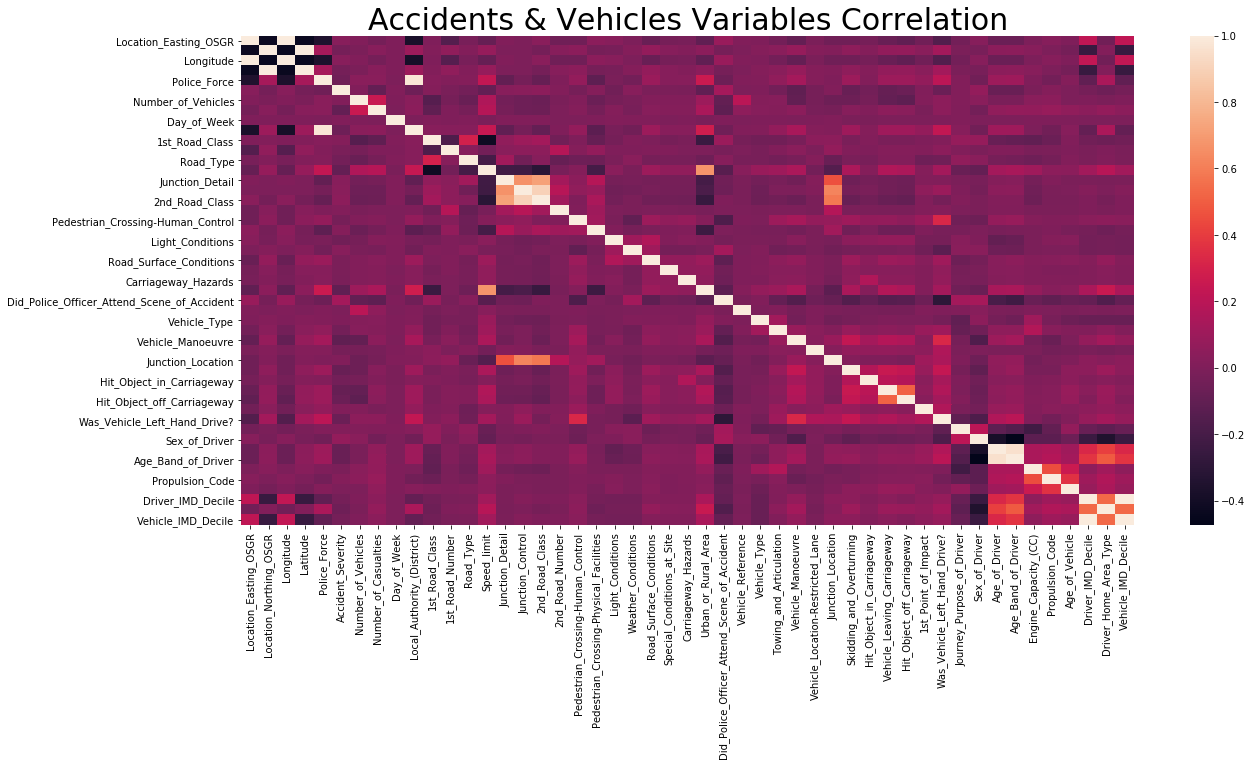

In [5]:
# Correlation between variables in the 2018 Accidents & Vehicles Datasets
acc_veh_corr =  accidents_vehicles.corr()
print("accidents_vehicles.corr().shape:", '\n', accidents_vehicles.corr().shape, '\n', "---"*20)
plt.subplots(figsize=(20,9))
plt.title('Accidents & Vehicles Variables Correlation',fontsize= 30)
sns.heatmap(acc_veh_corr)

Accident_Severity does not appear to strongly correlate to any other spevicic feature

## Drop Unnecessary Columns

In [0]:
accidents_vehicles.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 
'LSOA_of_Accident_Location', 'Local_Authority_(Highway)', 'Longitude',
 'Latitude'], axis=1, inplace=True)

## Add Date_time Column

In [0]:
# A Date_time column will be useful for data visualizations
accidents_vehicles['Date_time'] =  accidents_vehicles['Date'] +' '+ accidents_vehicles['Time']
accidents_vehicles['Date_time'] = pd.to_datetime(accidents_vehicles.Date_time)
accidents_vehicles.drop(['Date','Time'],axis =1 , inplace=True)

## Remove "-1s"

In [0]:
# The Documentation states that "-1" is used as a NaN value
for col in accidents_vehicles.columns:
    accidents_vehicles = (accidents_vehicles[accidents_vehicles[col]!=-1])
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

## Remove Na Values

In [0]:
accidents_vehicles.dropna(inplace=True)
casualties.dropna(inplace=True)

## Machine Learning

### Normalize the Age_of_Driver Data

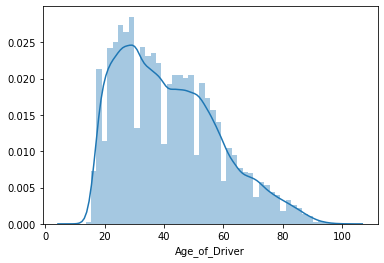

<Figure size 432x288 with 0 Axes>

In [10]:
# The documentation lists the age of drivers from 18 - 88 years old
sns.distplot(accidents_vehicles['Age_of_Driver']);
fig = plt.figure()

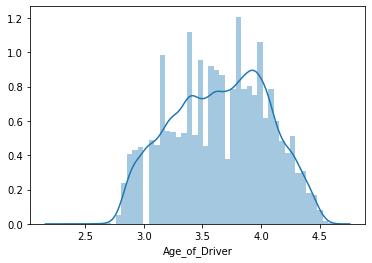

<Figure size 432x288 with 0 Axes>

In [11]:
accidents_vehicles['Age_of_Driver'] = np.log(accidents_vehicles['Age_of_Driver'])
sns.distplot(accidents_vehicles['Age_of_Driver']);
fig = plt.figure()

### Normalize the Age_of_Vehicle Data

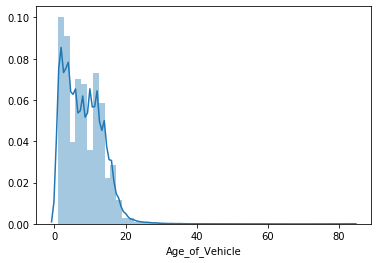

<Figure size 432x288 with 0 Axes>

In [12]:
# The documentation lists the age of the vehicles ranges from 0 - 100 years old
sns.distplot(accidents_vehicles['Age_of_Vehicle']);
fig = plt.figure()

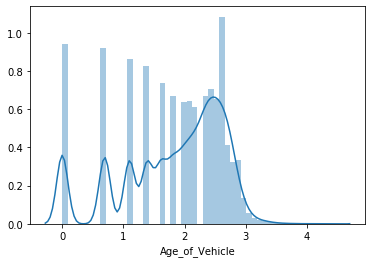

<Figure size 432x288 with 0 Axes>

In [13]:
accidents_vehicles['Age_of_Vehicle'] = np.log(accidents_vehicles['Age_of_Vehicle'])
sns.distplot(accidents_vehicles['Age_of_Vehicle']);
fig = plt.figure()

### Accuracy Score for the Accident Severity class baseline

#### According to the dataset:
* 1 Indicates a car accident with fatalities.
* 2 Indicates a car accident with serious injuries.
* 3 indicates a car accident with only slight injuries.

In [14]:
accidents_vehicles['Accident_Severity'].value_counts(normalize = True)

3.0    0.813698
2.0    0.177334
1.0    0.008967
Name: Accident_Severity, dtype: float64

### Train/Text Split

In [0]:
accident_ml = accidents_vehicles.drop('Accident_Severity' , axis=1)
accident_ml2 = accident_ml.drop('Date_time' , axis=1)

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml2.values, 
  accidents_vehicles['Accident_Severity'].values,test_size=0.20, random_state=99)

## Use scikit-learn to fit a logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='lbfgs', max_iter= 5000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Report classification metric: accuracy

In [17]:
# option with score method
model.score(X_test, y_test)

0.8115068104426788

In [18]:
# option with predict method
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8115068104426788

### Logistic Regression


In [19]:
lr = LogisticRegression(max_iter= 5000)
# Fit the model on the training data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)

### Confusion Matrix
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 81.15
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       141
         2.0   0.600000  0.001192  0.002379      2517
         3.0   0.811582  0.999825  0.895922     11438

    accuracy                       0.811507     14096
   macro avg   0.470527  0.333672  0.299434     14096
weighted avg   0.765683  0.811507  0.727408     14096



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2.0,3.0,All
Actual,,,
1.0,0,141,141
2.0,3,2514,2517
3.0,2,11436,11438
All,5,14091,14096


### Logistic Regression with Hyperparameter tuning


In [0]:
# from sklearn.linear_model import LogisticRegressionCV
# lr = LogisticRegressionCV(cv=3, random_state=0, max_iter= 5000, multi_class='multinomial')
# # Fit the model on the trainng data.
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# sk_report = classification_report(
#     digits=6,
#     y_true=y_test, 
#     y_pred=y_pred)
# print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
# print(sk_report)
# pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

### Decision Tree

In [21]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)

### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 71.2
              precision    recall  f1-score   support

         1.0   0.091549  0.092199  0.091873       141
         2.0   0.257405  0.290028  0.272744      2517
         3.0   0.835942  0.812555  0.824082     11438

    accuracy                       0.712046     14096
   macro avg   0.394965  0.398260  0.396233     14096
weighted avg   0.725191  0.712046  0.718310     14096



Predicted,1.0,2.0,3.0,All
Actual,,,,
1.0,13,46,82,141
2.0,45,730,1742,2517
3.0,84,2060,9294,11438
All,142,2836,11118,14096


### Decision Tree hyperparameters tuning


In [22]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=2)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)

### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 80.2
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       141
         2.0   0.310992  0.046087  0.080277      2517
         3.0   0.815346  0.978230  0.889392     11438

    accuracy                       0.802001     14096
   macro avg   0.375446  0.341439  0.323223     14096
weighted avg   0.717133  0.802001  0.736019     14096



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2.0,3.0,All
Actual,,,
1.0,8,133,141
2.0,116,2401,2517
3.0,249,11189,11438
All,373,13723,14096


### Random Forest

In [23]:
random_forest = RandomForestClassifier(n_estimators=3000)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 81.29
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       141
         2.0   0.532934  0.035360  0.066319      2517
         3.0   0.816283  0.994055  0.896440     11438

    accuracy                       0.812926     14096
   macro avg   0.449739  0.343138  0.320920     14096
weighted avg   0.757522  0.812926  0.739246     14096



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2.0,3.0,All
Actual,,,
1.0,10,131,141
2.0,89,2428,2517
3.0,68,11370,11438
All,167,13929,14096


### Random Forest Hyperparameter tuning

In [0]:
# from sklearn.model_selection import RandomizedSearchCV
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [4, 5],
#     'min_samples_leaf': [5, 10, 15],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300]
# }
# # Create a based model
# random_f = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = RandomizedSearchCV(estimator = random_f, param_distributions = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

# grid_search.fit(X_train,y_train)

## Data Visualizations

### Let's look at the number of accidents that occur on each day of the week.

Text(0.5, 0, 'Day of the Week')

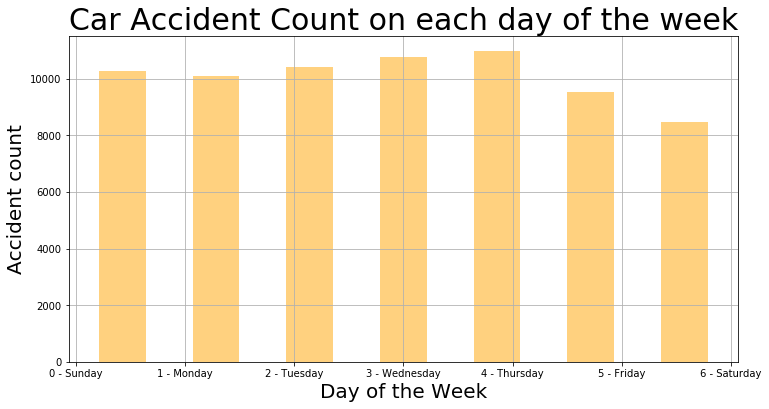

In [25]:
objects = ['0 - Sunday', '1 - Monday', '2 - Tuesday', '3 - Wednesday', '4 - Thursday', '5 - Friday', '6 - Saturday']

plt.figure(figsize=(12,6))
accidents_vehicles.Date_time.dt.dayofweek.hist(bins = 7, rwidth = 0.50,
  alpha = 0.50, color= 'orange')
plt.title('Car Accident Count on each day of the week' , fontsize= 30)
plt.grid(True)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('Day of the Week' , fontsize = 20)

### Let's look at the number of accidents that occur during each hour of the day

Text(0, 0.5, 'Accident count')

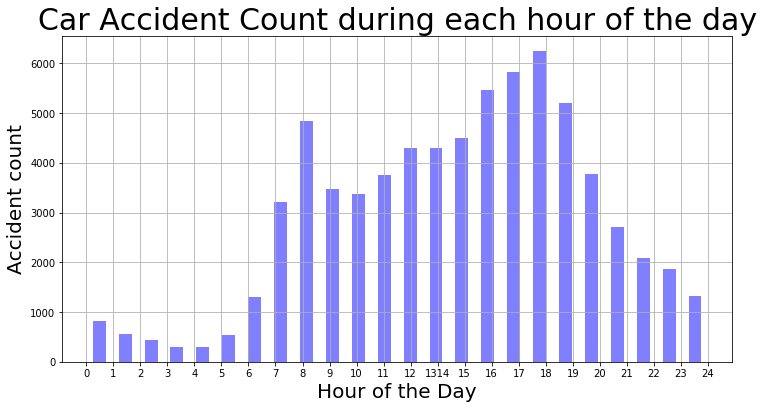

In [26]:
objects = ['0','1','2','3','4','5','6', '7', '8', '9', '10', '11', '12', '13'
  '14', '15', '16', '17', '18', '19', '20', '21','22', '23', '24']

plt.figure(figsize=(12,6))
accidents_vehicles.Date_time.dt.hour.hist(bins = 24, rwidth = 0.50, alpha = 0.50, color= 'blue')
plt.title('Car Accident Count during each hour of the day',fontsize= 30)
plt.grid(True)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.xlabel('Hour of the Day', fontsize = 20)
plt.ylabel('Accident count', fontsize = 20)

### Let's look at the age range of people that were involved in the accidents

Text(0.5, 0, 'Age of People')

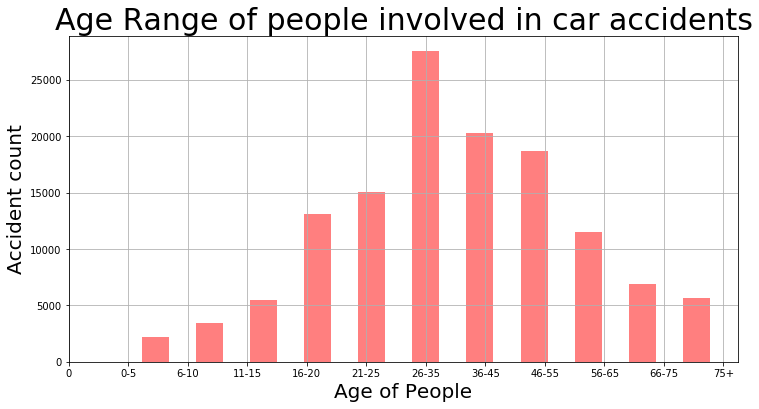

In [27]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
  '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11, alpha=0.5, rwidth=0.50, color= 'red')
plt.title('Age Range of people involved in car accidents', fontsize = 30)
plt.grid(True)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('Age of People', fontsize = 20)

### Let's look at the number of accidents that occur in each of the recorded speed zones

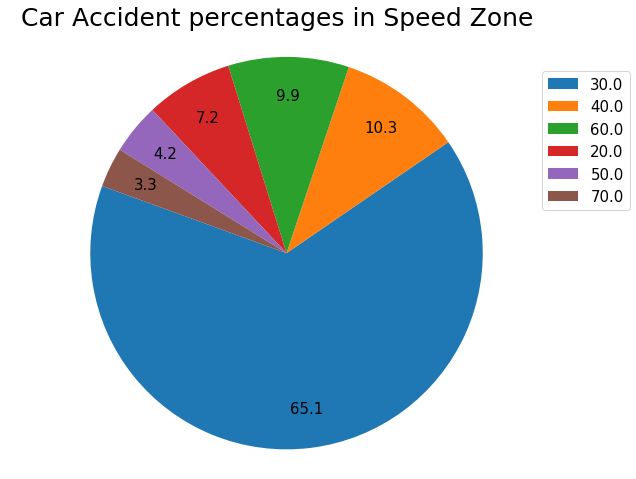

In [28]:
speed_zone_accidents = accidents_vehicles.loc[accidents['Speed_limit'].isin(['10', '20'
 ,'30' ,'40' ,'50' ,'60' ,'70', '80'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
  autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode,
   shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Car Accident percentages in Speed Zone', fontsize=25, ha='center')
plt.show()

### Let's look at Feature Importance

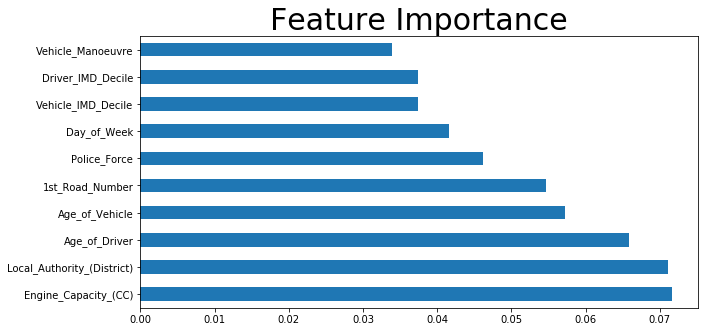

In [29]:
plt.figure(figsize=(10,5))
plt.title('Feature Importance' , fontsize= 30)
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml2.columns)
feat_importances.nlargest(10).plot(kind='barh')

### From what we can see it looks like:


1.   Thursday is the day of the week that has the most accidents.
2.   6:00pm GMT is the hour of the day with the most accidents.
3.   People aged 26 - 35 are the people most involved in accidents.
4.   Most accidents occur with vehicles in the 30 mph speed zone.
5. Engine Capacity, the Local Authority, the Age of the driver, age of the vehicle, and the road type appear to have be the top 5 features that affect the severity of the accidents
